Beam trace me up, Scotty!
scotty version 3.0.3.dev46+geba3769.d20250311
Run ID: 525ac403-1243-4fa2-a190-c3fe2fa037ab
ne(psi): loading from input file
Using OMFIT JSON Torbeam file for B and poloidal flux
Beam launched from outside the plasma
Starting the solvers
Time taken (ray solver) 0.12021183967590332 s
Time taken (cut-off finder) 0.011770963668823242 s
Time taken (beam solver) 2.3229095935821533s
Number of beam evolution evaluations: 932
Time per beam evolution evaluation: 0.00249239226779201
Main loop complete
Analysing data
The final value of H_Booker is -8.628379949360276e-05
polflux:  0.4281331838714832
theta_m:  0.38691184771290554
delta_theta_m:  0.3451444796605612
mismatch attenuation:  0.08099681242760264
Making figures
Figures have been saved


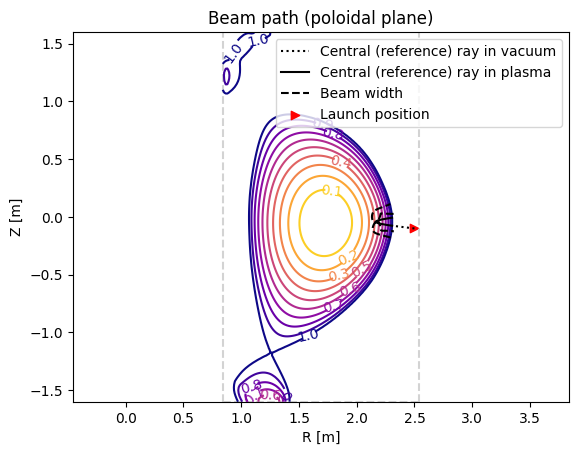

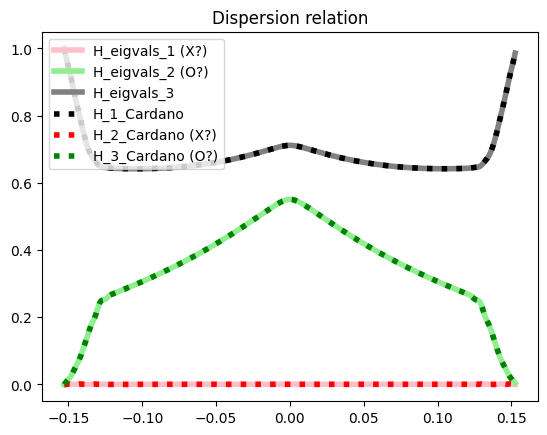

In [22]:
import numpy as np
from scotty.beam_me_up import beam_me_up

kwargs_dict = {
    'poloidal_launch_angle_Torbeam': -7, # original is -7.0
    'toroidal_launch_angle_Torbeam': 3, # original is 0.0
    'launch_freq_GHz': 72.5,
    'mode_flag': -1,
    'launch_beam_width': 0.1265,
    'launch_beam_curvature': -0.95,
    'launch_position': np.array([ 2.5 ,  0.    , -0.1]),
    'find_B_method': 'omfit',
    'Psi_BC_flag': 'continuous',
    'poloidal_flux_enter': 1.0,
    'poloidal_flux_zero_density': 1.0,
    'figure_flag': True,
    'vacuum_propagation_flag': True,
    'vacuumLaunch_flag': True,
    'ne_data_path': r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cyl scotty",
    'magnetic_data_path': r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cyl scotty",
    # 'input_filename_suffix': "_189998_3000ms",
    'input_filename_suffix': "_189998_3000ms_quinn",
    'output_path': r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cyl scotty",
}

kwargs_dict["delta_R"] = -1e-3
kwargs_dict["delta_Z"] = 1e-3
kwargs_dict["delta_K_R"]    = 1e-1
kwargs_dict["delta_K_zeta"] = 1e-1
kwargs_dict["delta_K_Z"]    = 1e-1
kwargs_dict["interp_smoothing"] = 0.0
kwargs_dict["interp_order"] = 5
kwargs_dict["len_tau"] = 1002
kwargs_dict["rtol"] = 1e-4
kwargs_dict["atol"] = 1e-7

dt_cyl_scotty = beam_me_up(**kwargs_dict)

In [23]:
from scotty.fun_general import cylindrical_to_cartesian, find_K_lab_Cartesian, find_Psi_3D_lab_Cartesian

# print(dt_cyl_scotty.keys())
print()
print("q_launch (cyl) ", np.array(dt_cyl_scotty["inputs"]["launch_position"]))
print("q_initial (cyl)", np.array(dt_cyl_scotty["inputs"]["initial_position"]))
print()
print("K_launch (cyl) ", np.array(dt_cyl_scotty["inputs"]["launch_K"]))
print("K_initial (cyl)", np.array(dt_cyl_scotty["inputs"]["K_initial"]))
print()
print("Psi_launch (cyl)")
print(np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_launch"]))
print()
print("Psi_initial (cyl)")
print(np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_initial"]))
print()

print("CONVERTING TO CARTESIAN...")

print()
print("q_launch (cart) ", np.array(cylindrical_to_cartesian(
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[2])))
print("q_initial (cart)", np.array(cylindrical_to_cartesian(
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[2])))
print()
print("K_launch (cart) ", np.array(find_K_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["launch_K"]),
    np.array(dt_cyl_scotty["inputs"]["launch_position"]))))
print("K_initial (cart)", np.array(find_K_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["K_initial"]),
    np.array(dt_cyl_scotty["inputs"]["initial_position"]))))
print()
print("Psi_launch (cart)")
print(np.array(find_Psi_3D_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_launch"]),
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["launch_K"])[0],
    np.array(dt_cyl_scotty["inputs"]["launch_K"])[1])))
print()
print("Psi_entry (cart)")
print(np.array(find_Psi_3D_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_entry"]),
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["K_initial"])[0],
    np.array(dt_cyl_scotty["inputs"]["K_initial"])[1])))
print()
print("Psi_initial (cart)")
print(np.array(find_Psi_3D_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_initial"]),
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["K_initial"])[0],
    np.array(dt_cyl_scotty["inputs"]["K_initial"])[1])))


q_launch (cyl)  [ 2.5  0.  -0.1]
q_initial (cyl) [ 2.30654135 -0.00439617 -0.07621093]

K_launch (cyl)  [-1506.09472739  -197.32770013   185.17896111]
K_initial (cyl) [-1505.73318078  -197.32770013   185.17896111]

Psi_launch (cyl)
[[  -25.33439157  +2.19350509j   106.8779326  -16.08773645j
   -174.36943676 +15.09727382j]
 [  106.8779326  -16.08773645j -5232.37645516+779.03234581j
    -22.84578739  +1.97803649j]
 [ -174.36943676 +15.09727382j   -22.84578739  +1.97803649j
  -1422.07400239+123.12616827j]]

Psi_initial (cyl)
[[-17971.93447391  +3.39350137j    142.02614021 -24.23130165j
     702.72265466 +22.73969981j]
 [   142.02614021 -24.23130165j  -5905.4236934 +998.57147014j
     -27.98808067  +2.98003033j]
 [   702.72265466 +22.73969981j    -27.98808067  +2.98003033j
   -1788.94195725+185.49701924j]]

CONVERTING TO CARTESIAN...

q_launch (cart)  [ 2.5  0.  -0.1]
q_initial (cart) [ 2.30651906 -0.01013991 -0.07621093]

K_launch (cart)  [-1506.09472739   -78.93108005   185.17896111]
K_

In [1]:
import numpy as np
from scotty.beam_me_up_3D_temp import beam_me_up_3D

kwargs_dict = {
    'poloidal_launch_angle_Torbeam': -7, # original is -7.0
    'toroidal_launch_angle_Torbeam': 3, # original is 0.0
    'launch_freq_GHz': 72.5,
    'mode_flag': -1,
    'launch_beam_width': 0.1265,
    'launch_beam_curvature': -0.95,
    'launch_position_cartesian': np.array([ 2.5 ,  0.    , -0.1]),
    'find_B_method': 'omfit_3D',
    'Psi_BC_flag': 'continuous',
    'poloidal_flux_enter': 1.0,
    'poloidal_flux_zero_density': 1.0,
    'figure_flag': True,
    'vacuum_propagation_flag': True,
    'vacuumLaunch_flag': True,
    'ne_data_path': r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cart scotty",
    'magnetic_data_path': r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cart scotty",
    # 'input_filename_suffix': "_189998_3000ms",
    'input_filename_suffix': "_189998_3000ms_quinn",
    'output_path': r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cart scotty",
}

kwargs_dict["delta_X"] = -1e-3
kwargs_dict["delta_Y"] = 1e-3
kwargs_dict["delta_Z"] = 1e-3
kwargs_dict["delta_K_X"] = 1e-1
kwargs_dict["delta_K_Y"] = 1e-1
kwargs_dict["delta_K_Z"] = 1e-1
kwargs_dict["interp_smoothing"] = 0.0
kwargs_dict["interp_order"] = 5
kwargs_dict["len_tau"] = 1002
kwargs_dict["rtol"] = 1e-4
kwargs_dict["atol"] = 1e-7

dt_cart_scotty, field, q_launch_cartesian, q_initial_cartesian, K_launch_cartesian, K_initial_cartesian, Psi_3D_initial_labframe_cartesian = beam_me_up_3D(**kwargs_dict)

print("q_launch_cartesian", q_launch_cartesian)
print("q_initial_cartesian", q_initial_cartesian)
print()
print("K_launch_cartesian", K_launch_cartesian)
print("K_initial_cartesian", K_initial_cartesian)
print()
print("Psi_3D_initial_labframe_cartesian")
print(Psi_3D_initial_labframe_cartesian)

Beam trace me up, Scotty!
scotty version 3.0.3.dev46+geba3769.d20250311
Run ID: cd7f98e9-7b0c-4190-9455-c9286cc249e0
ne(psi): loading from input file
Using OMFIT JSON Torbeam file for B and polflux
TO REMOVE: launch position [ 2.5  0.  -0.1]

TO REMOVE: XYZ_array (steps) [-5.18096285 -0.27152276  0.63701526]

TO REMOVE: tau [-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11

In [ ]:
Psi_from_cyl_scotty = np.array(
    [[-1.79707537e+04  +3.30469685j,  1.69919327e+02  -9.69484715j,  7.02662520e+02 +22.74515986j],
     [ 1.69919327e+02  -9.69484715j, -1.76400502e+03+187.78551651j, -1.52233786e+01  +1.19201119j],
     [ 7.02662520e+02 +22.74515986j, -1.52233786e+01  +1.19201119j, -1.78894196e+03+185.49701924j]]
)

Re_Psi_from_cyl_scotty = np.real(Psi_from_cyl_scotty)
Im_Psi_from_cyl_scotty = np.imag(Psi_from_cyl_scotty)

Psi_from_cart_scotty = np.array(
    [[-1.79636921e+04  +3.30333533j, 1.66218418e+02  -9.70204913j, 7.02921259e+02 +22.73658049j],
     [ 1.66218418e+02  -9.70204913j, -1.76397293e+03+187.7855157j, -1.50350688e+01  +1.19242441j],
     [ 7.02921259e+02 +22.73658049j, -1.50350688e+01  +1.19242441j, -1.78898538e+03+185.49785715j]]
)

print(Psi_from_cyl_scotty - Psi_from_cart_scotty)

[[-7.0616   +1.36152000e-03j  3.700909 +7.20198000e-03j
  -0.258739 +8.57937000e-03j]
 [ 3.700909 +7.20198000e-03j -0.03209  +8.10000017e-07j
  -0.1883098-4.13220000e-04j]
 [-0.258739 +8.57937000e-03j -0.1883098-4.13220000e-04j
   0.04342  -8.37910000e-04j]]
